In [1]:
import pandas as pd
import numpy as np

In [9]:
column_names = ['Time', 'ppm/min']
In= pd.read_csv('../../DataFiles/Netatmo2016_2017CO2ppm.csv', parse_dates=True, index_col=0, names = column_names)
In.head()

ppm/min 
 
 
 Time 
 
 
 
 
 
 2016-02-19 13:26:00 
 NaN 
 
 
 2016-02-19 13:27:00 
 718.0 
 
 
 2016-02-19 13:27:00 
 NaN 
 
 
 2016-02-19 13:31:00 
 337.0 
 
 
 2016-02-19 13:36:00 
 332.0

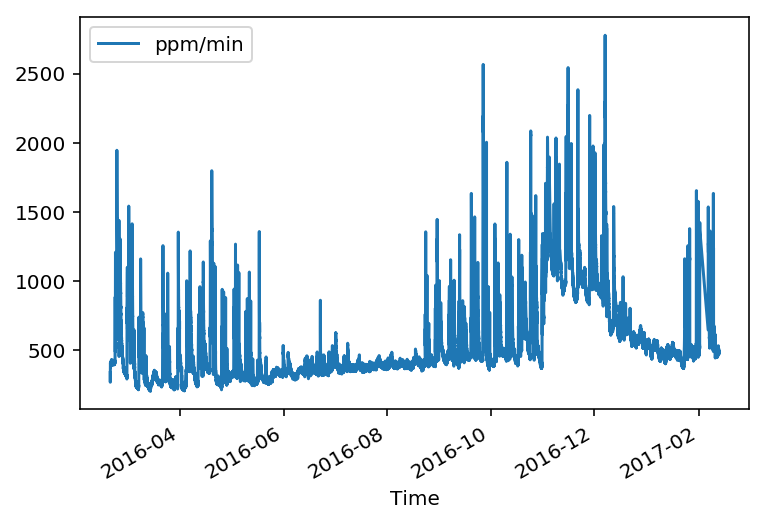

In [10]:
%matplotlib inline
In.plot()

In [11]:
df1 = In

In [12]:
df1['Outsidepmm'] = 400

In [13]:
df1.describe()

ppm/min 
 Outsidepmm 
 
 
 
 
 count 
 100985.000000 
 100991.0 
 
 
 mean 
 547.646878 
 400.0 
 
 
 std 
 304.511307 
 0.0 
 
 
 min 
 201.000000 
 400.0 
 
 
 25% 
 362.000000 
 400.0 
 
 
 50% 
 438.000000 
 400.0 
 
 
 75% 
 615.000000 
 400.0 
 
 
 max 
 2777.000000 
 400.0

In [14]:
df1['Infiltration'] = (df1['ppm/min']*41000)/df1['Outsidepmm']

In [15]:
df1.head()

ppm/min 
 Outsidepmm 
 Infiltration 
 
 
 Time 
 
 
 
 
 
 
 
 2016-02-19 13:26:00 
 NaN 
 400 
 NaN 
 
 
 2016-02-19 13:27:00 
 718.0 
 400 
 73595.0 
 
 
 2016-02-19 13:27:00 
 NaN 
 400 
 NaN 
 
 
 2016-02-19 13:31:00 
 337.0 
 400 
 34542.5 
 
 
 2016-02-19 13:36:00 
 332.0 
 400 
 34030.0

In [9]:
PPM = pd.read_csv('Netatmo2016_2017CO2ppm.csv', parse_dates=True, index_col=1)

In [10]:
%matplotlib inline
PPM['ppm'].plot()

In [11]:
df3 = PPM
df3.head(5)

Unnamed: 0 
 ppm 
 
 
 Time 
 
 
 
 
 
 
 2016-02-19 13:26:00 
 0 
 NaN 
 
 
 2016-02-19 13:27:00 
 1 
 718.0 
 
 
 2016-02-19 13:27:00 
 2 
 NaN 
 
 
 2016-02-19 13:31:00 
 3 
 337.0 
 
 
 2016-02-19 13:36:00 
 4 
 332.0

In [12]:
delta_CO2 = df3['ppm'].diff(1)
df3['Time'] = df3.index
delta_time = df3['Time'].diff(1) / np.timedelta64(1,'m')

In [13]:
df3['Slope'] = delta_CO2 / delta_time

In [14]:
df3.head(5)

Unnamed: 0 
 ppm 
 Time 
 Slope 
 
 
 Time 
 
 
 
 
 
 
 
 
 2016-02-19 13:26:00 
 0 
 NaN 
 2016-02-19 13:26:00 
 NaN 
 
 
 2016-02-19 13:27:00 
 1 
 718.0 
 2016-02-19 13:27:00 
 NaN 
 
 
 2016-02-19 13:27:00 
 2 
 NaN 
 2016-02-19 13:27:00 
 NaN 
 
 
 2016-02-19 13:31:00 
 3 
 337.0 
 2016-02-19 13:31:00 
 NaN 
 
 
 2016-02-19 13:36:00 
 4 
 332.0 
 2016-02-19 13:36:00 
 -1.0

In [15]:
slope = delta_CO2 / delta_time

In [16]:
%matplotlib
df3['Slope'].plot()

Using matplotlib backend: Qt5Agg


RuntimeError: Invalid DISPLAY variable

In [0]:
df = PPM

In [0]:
df['CO2volume'] = df['ppm']*((1/1E6)*41000)

Above, I created a new column called CO2volume, in which i converted the ppm into cubic feet

In [0]:
df.describe()

In [0]:
del df['Volume']

In [0]:
df.head()

In [0]:
df['Volume_other_gases'] = 41000 - df['CO2volume']

In [0]:
df.head()

In [0]:
df.describe()

In [0]:
delta_CO2 = df['CO2volume'].diff(1)
delta_Gases = df['Volume_other_gases'].diff(1)

In [0]:
df['Time'] = df.index
delta_time = df['Time'].diff(1) / np.timedelta64(1,'m')
slopes = (delta_CO2+delta_Gases) / delta_time

In [0]:
%matplotlib inline
slopes.plot()

In [0]:
slopes.describe()